# Zomato Restaurant

In [135]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.combine import SMOTEENN
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import metrics
from collections import Counter
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [10]:
df1=pd.read_excel("c:\\Users\\dell\\Documents\\Country_Code.xlsx")
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [13]:
df2=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv", encoding="ISO-8859-1")
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [14]:
df3=pd.merge(df1,df2)
df3

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


In [15]:
df3.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [16]:
df3.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [17]:
# to check for the data types
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [18]:
df3.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [19]:
df3.nunique()

Country Code              15
Country                   15
Restaurant ID           9551
Restaurant Name         7446
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [20]:
df3.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [22]:
len(df3.Cuisines)

9551

In [25]:
# checking for null values
df3.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [27]:
# removing useless columns from the dataset
df3.drop(columns=['Restaurant ID', 'Is delivering now'], inplace=True)

In [28]:
df3.columns

Index(['Country Code', 'Country', 'Restaurant Name', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [146]:
df3.describe()

,Average Cost for two,Has Table booking,Aggregate rating,Votes
count,7671.000000,7671.000000,7671.000000,7671.000000
mean,605.307000,0.134402,2.413140,108.719593
std,606.464314,0.341106,1.505473,327.906486
min,50.000000,0.000000,0.000000,0.000000
25%,300.000000,0.000000,0.000000,3.000000
50%,450.000000,0.000000,3.000000,20.000000
75%,700.000000,0.000000,3.500000,81.000000
max,8000.000000,1.000000,4.900000,7931.000000


In [30]:
df3['Country Code'].nunique()

15

In [31]:
df3['Country Code'].value_counts()

1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: Country Code, dtype: int64

In [32]:
mask=df3['Country Code']==1
df3=df3[mask]

In [33]:
df3.shape

(8652, 20)

In [34]:
# removing useless columns from the dataset
df3.drop(columns=['Country Code', 'Currency'], inplace=True)

In [35]:
df3.shape

(8652, 18)

In [36]:
df3.columns

Index(['Country', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [37]:
df3['City'].nunique()

43

In [39]:
# city names with restaurants
df3['City'].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

New Delhi    5473
Gurgaon      1118
Noida        1080
Name: City, dtype: int64


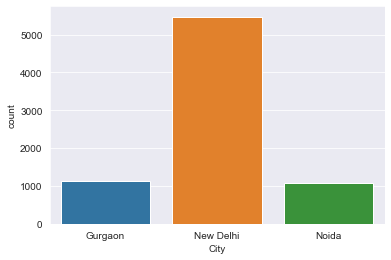

In [141]:
# vizualization of the data
ax=sns.countplot(x='City', data=df3)
print(df3['City'].value_counts())

<AxesSubplot:>

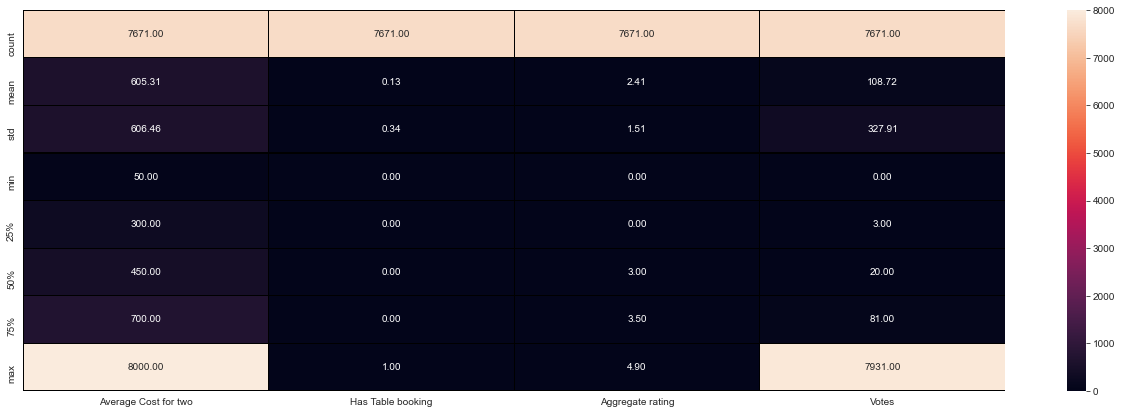

In [148]:
# visualization of describe data using heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df3.describe(), annot=True, linewidths=0.1, linecolor='black',fmt="0.2f")

0       1035
1        461
2        312
3        229
4        195
        ... 
1457       1
1758       1
1838       1
2252       1
1147       1
Name: Votes, Length: 737, dtype: int64


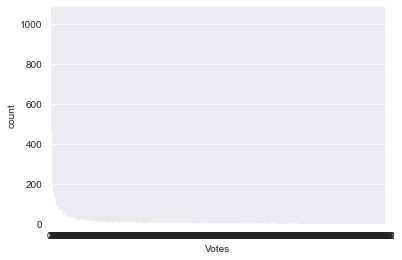

In [149]:
# vizualization of the data
ax=sns.countplot(x='Votes', data=df3)
print(df3['Votes'].value_counts())

In [41]:
# number of restaurants in delhi NCR
mask=df3['City'].isin(['New Delhi','Gurgaon','Noida'])
df3=df3[mask]
df3.shape

(7671, 18)

In [42]:
df3['Restaurant Name'].nunique()

5834

In [44]:
# checking the number of restaurants
df3['Restaurant Name'].value_counts()

Cafe Coffee Day         81
Domino's Pizza          75
Subway                  60
Green Chick Chop        47
McDonald's              44
                        ..
Sahni Chicken Corner     1
Rewari Sweets            1
Pindi's Kitchen          1
Nagi Fish Corner         1
The Grand                1
Name: Restaurant Name, Length: 5834, dtype: int64

In [45]:
# removing useless columns from the dataset
df3.drop(columns=['Restaurant Name', 'Address','Locality','Locality Verbose','Rating color','Rating text'], inplace=True)

In [46]:
df3.columns

Index(['Country', 'City', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Switch to order menu', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [48]:
df3['Has Table booking']

537      No
538     Yes
539     Yes
540     Yes
541      No
       ... 
8484     No
8485     No
8486     No
8487     No
8488     No
Name: Has Table booking, Length: 7671, dtype: object

In [49]:
df3['Has Online delivery']

537      No
538     Yes
539     Yes
540     Yes
541      No
       ... 
8484    Yes
8485     No
8486     No
8487     No
8488     No
Name: Has Online delivery, Length: 7671, dtype: object

In [50]:
df3['Switch to order menu']

537     No
538     No
539     No
540     No
541     No
        ..
8484    No
8485    No
8486    No
8487    No
8488    No
Name: Switch to order menu, Length: 7671, dtype: object

In [51]:
# removing useless columns from the dataset
df3.drop(columns=['Switch to order menu'], inplace=True)

In [53]:
df3.columns.shape

(11,)

In [54]:
# checking the number of restaurants
df3['Cuisines'].value_counts()

North Indian                                      873
North Indian, Chinese                             447
Fast Food                                         320
Chinese                                           314
North Indian, Mughlai                             303
                                                 ... 
Healthy Food, Fast Food                             1
North Indian, Rajasthani, Gujarati                  1
North Indian, Chinese, Continental, Seafood         1
Mediterranean, Continental, Italian                 1
Chinese, North Indian, South Indian, Fast Food      1
Name: Cuisines, Length: 1143, dtype: int64

North Indian                                      873
North Indian, Chinese                             447
Fast Food                                         320
Chinese                                           314
North Indian, Mughlai                             303
                                                 ... 
Healthy Food, Fast Food                             1
North Indian, Rajasthani, Gujarati                  1
North Indian, Chinese, Continental, Seafood         1
Mediterranean, Continental, Italian                 1
Chinese, North Indian, South Indian, Fast Food      1
Name: Cuisines, Length: 1143, dtype: int64


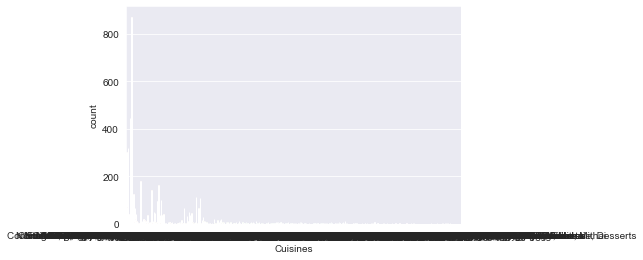

In [145]:
# vizualization of the data
ax=sns.countplot(x='Cuisines', data=df3)
print(df3['Cuisines'].value_counts())

In [56]:
df3['Cuisines'].nunique()

1143

In [57]:
df3['Cuisines'].nunique

<bound method IndexOpsMixin.nunique of 537                   Cafe, Beverages
538             North Indian, Mughlai
539             North Indian, Mughlai
540     South Indian, Seafood, Kerala
541                            Bakery
                    ...              
8484            North Indian, Chinese
8485                        Fast Food
8486                        Fast Food
8487            North Indian, Chinese
8488             Raw Meats, Fast Food
Name: Cuisines, Length: 7671, dtype: object>

In [58]:
df3.columns

Index(['Country', 'City', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [61]:
# changing the data from categorical to numerical
df3['Has Table booking'].replace('Yes',1,inplace=True)
df3['Has Table booking'].replace('No',0,inplace=True)

In [62]:
df3['Has Table booking'].value_counts()

0    6640
1    1031
Name: Has Table booking, dtype: int64

In [63]:
# changing the data from categorical to numerical
df3['Has Online delivery'].replace('Yes',1,inplace=True)
df3['Has Online delivery'].replace('No',0,inplace=True)

In [64]:
df3['Has Online delivery'].value_counts()

0    5393
1    2278
Name: Has Online delivery, dtype: int64

In [65]:
# using correlation technique
df3.corr()['Average Cost for two']

Longitude               0.071854
Latitude                0.070816
Average Cost for two    1.000000
Has Table booking       0.643845
Has Online delivery     0.072198
Price range             0.848425
Aggregate rating        0.329785
Votes                   0.297741
Name: Average Cost for two, dtype: float64

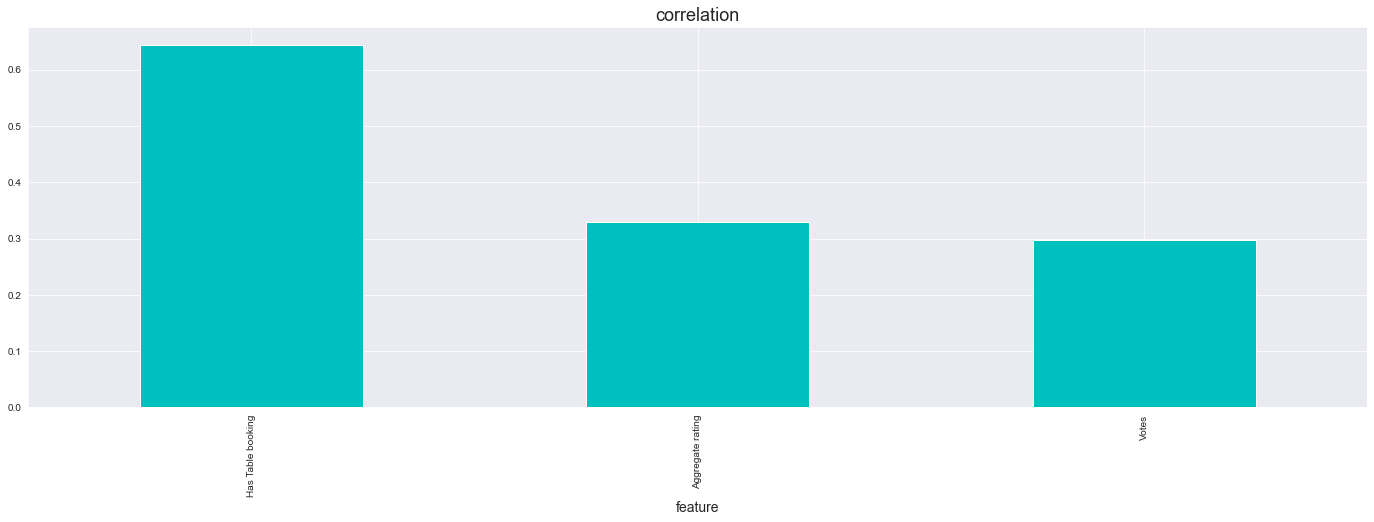

In [151]:
# using barplot to check correlation value
plt.figure(figsize=(24,7))
df3.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar',color='c')
plt.xlabel('feature', fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

In [70]:
df3.drop(columns=['Longitude','Latitude','Has Online delivery','Price range'], inplace=True)


In [71]:
df3.columns

Index(['Country', 'City', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Aggregate rating', 'Votes'],
      dtype='object')

In [72]:
df3

,Country,City,Cuisines,Average Cost for two,Has Table booking,Aggregate rating,Votes
537,India,Gurgaon,"Cafe, Beverages",350,0,3.4,16
538,India,Gurgaon,"North Indian, Mughlai",800,1,2.7,80
539,India,Gurgaon,"North Indian, Mughlai",2000,1,4.3,1887
540,India,Gurgaon,"South Indian, Seafood, Kerala",1400,1,4.0,802
541,India,Gurgaon,Bakery,250,0,3.0,4
...,...,...,...,...,...,...,...
8484,India,Noida,"North Indian, Chinese",700,0,2.6,34
8485,India,Noida,Fast Food,400,0,0.0,1
8486,India,Noida,Fast Food,600,0,0.0,3
8487,India,Noida,"North Indian, Chinese",500,0,0.0,0


In [74]:
# Average cost of two per restaurant
df3.groupby('Cuisines')['Average Cost for two'].mean()

Cuisines
Afghani                                       512.500000
Afghani, Mughlai, Chinese                     500.000000
Afghani, North Indian                         900.000000
Afghani, North Indian, Pakistani, Arabian     500.000000
American                                      666.666667
                                                ...     
Tibetan, Street Food                          100.000000
Turkish                                       600.000000
Turkish, Arabian, Moroccan, Lebanese          400.000000
Turkish, Mediterranean, Middle Eastern       2000.000000
Vietnamese                                   1000.000000
Name: Average Cost for two, Length: 1143, dtype: float64

In [77]:
# storing in new data frame
cuisine=df3.groupby('Cuisines')['Average Cost for two'].mean().reset_index()
cuisine

,Cuisines,Average Cost for two
0,Afghani,512.500000
1,"Afghani, Mughlai, Chinese",500.000000
2,"Afghani, North Indian",900.000000
3,"Afghani, North Indian, Pakistani, Arabian",500.000000
4,American,666.666667
...,...,...
1138,"Tibetan, Street Food",100.000000
1139,Turkish,600.000000
1140,"Turkish, Arabian, Moroccan, Lebanese",400.000000
1141,"Turkish, Mediterranean, Middle Eastern",2000.000000


In [81]:
# merging the two datasets
new_data=df3.merge(cuisine, on='Cuisines')
new_data


,Country,City,Cuisines,Average Cost for two_x,Has Table booking,Aggregate rating,Votes,Average Cost for two_y
0,India,Gurgaon,"Cafe, Beverages",350,0,3.4,16,416.666667
1,India,New Delhi,"Cafe, Beverages",200,0,0.0,0,416.666667
2,India,New Delhi,"Cafe, Beverages",700,0,4.1,92,416.666667
3,India,Gurgaon,"North Indian, Mughlai",800,1,2.7,80,755.511551
4,India,Gurgaon,"North Indian, Mughlai",2000,1,4.3,1887,755.511551
...,...,...,...,...,...,...,...,...
7666,India,Noida,"European, North Indian, Chinese",2500,1,2.2,116,2500.000000
7667,India,Noida,"Juices, Beverages, Fast Food",200,0,3.0,10,200.000000
7668,India,Noida,"Bakery, Desserts, Fast Food, North Indian",450,0,3.5,105,450.000000
7669,India,Noida,"Continental, Lebanese, Mexican",1000,1,0.0,0,1000.000000


In [82]:
# dropping cuisines columns
new_data.drop(columns=['Cuisines'], inplace=True)

In [83]:
# Average cost of two
new_data

,Country,City,Average Cost for two_x,Has Table booking,Aggregate rating,Votes,Average Cost for two_y
0,India,Gurgaon,350,0,3.4,16,416.666667
1,India,New Delhi,200,0,0.0,0,416.666667
2,India,New Delhi,700,0,4.1,92,416.666667
3,India,Gurgaon,800,1,2.7,80,755.511551
4,India,Gurgaon,2000,1,4.3,1887,755.511551
...,...,...,...,...,...,...,...
7666,India,Noida,2500,1,2.2,116,2500.000000
7667,India,Noida,200,0,3.0,10,200.000000
7668,India,Noida,450,0,3.5,105,450.000000
7669,India,Noida,1000,1,0.0,0,1000.000000


In [89]:
new_data.rename(columns={'Average Cost for two_x':'Cost','Average Cost for two_y':'Cuisine'}, inplace=True)

In [120]:
# average cost of two with new naming
new_data

,City,Has Table booking,Aggregate rating,Votes,cuisine,cost
0,Gurgaon,0,3.4,16,416.666667,350
1,New Delhi,0,0.0,0,416.666667,200
2,New Delhi,0,4.1,92,416.666667,700
3,Gurgaon,1,2.7,80,755.511551,800
4,Gurgaon,1,4.3,1887,755.511551,2000
...,...,...,...,...,...,...
7666,Noida,1,2.2,116,2500.000000,2500
7667,Noida,0,3.0,10,200.000000,200
7668,Noida,0,3.5,105,450.000000,450
7669,Noida,1,0.0,0,1000.000000,1000


In [92]:
new_data=new_data[['City','Has Table booking','Aggregate rating','Votes','cuisine','cost']]

In [93]:
new_data

,City,Has Table booking,Aggregate rating,Votes,cuisine,cost
0,Gurgaon,0,3.4,16,416.666667,350
1,New Delhi,0,0.0,0,416.666667,200
2,New Delhi,0,4.1,92,416.666667,700
3,Gurgaon,1,2.7,80,755.511551,800
4,Gurgaon,1,4.3,1887,755.511551,2000
...,...,...,...,...,...,...
7666,Noida,1,2.2,116,2500.000000,2500
7667,Noida,0,3.0,10,200.000000,200
7668,Noida,0,3.5,105,450.000000,450
7669,Noida,1,0.0,0,1000.000000,1000


In [96]:
# fetching X and Y data
X=new_data.iloc[:,:-1].values
print(X)
y=new_data.iloc[:,-1].values
print(y)

[['Gurgaon' 0 3.4 16 416.6666666666667]
 ['New Delhi' 0 0.0 0 416.6666666666667]
 ['New Delhi' 0 4.1 92 416.6666666666667]
 ...
 ['Noida' 0 3.5 105 450.0]
 ['Noida' 1 0.0 0 1000.0]
 ['Noida' 0 2.0 161 450.0]]
[ 350  200  700 ...  450 1000  450]


In [99]:
# using label encoding technique convert to numerical data
encoder=LabelEncoder()
X[:, 0]=encoder.fit_transform(X[:, 0])
X

array([[0, 0, 3.4, 16, 416.6666666666667],
       [1, 0, 0.0, 0, 416.6666666666667],
       [1, 0, 4.1, 92, 416.6666666666667],
       ...,
       [2, 0, 3.5, 105, 450.0],
       [2, 1, 0.0, 0, 1000.0],
       [2, 0, 2.0, 161, 450.0]], dtype=object)

In [109]:
# train test the data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=9)

In [110]:
X_train.shape

(6136, 2)

In [111]:
X_test.shape

(1535, 2)

In [112]:
new_data

,City,Has Table booking,Aggregate rating,Votes,cuisine,cost
0,Gurgaon,0,3.4,16,416.666667,350
1,New Delhi,0,0.0,0,416.666667,200
2,New Delhi,0,4.1,92,416.666667,700
3,Gurgaon,1,2.7,80,755.511551,800
4,Gurgaon,1,4.3,1887,755.511551,2000
...,...,...,...,...,...,...
7666,Noida,1,2.2,116,2500.000000,2500
7667,Noida,0,3.0,10,200.000000,200
7668,Noida,0,3.5,105,450.000000,450
7669,Noida,1,0.0,0,1000.000000,1000


In [114]:
# model building using algorithm Linear Regression
regressor=LinearRegression()

In [115]:
regressor.fit(X_train, y_train)

LinearRegression()

In [117]:
y_pred=regressor.predict(X_test)

In [118]:
r2_score(y_test,y_pred)

0.6614434238314322

In [121]:
# Using Random Forest Regressor
regressor1=RandomForestRegressor(n_estimators=200)

In [122]:
regressor1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [123]:
y_pred1=regressor1.predict(X_test)

In [132]:
r2_score(y_test, y_pred1)

0.5330421805856607

In [127]:
# Using DecisionTree Regressor
regressor2=DecisionTreeRegressor()

In [128]:
regressor2.fit(X_train,y_train)

DecisionTreeRegressor()

In [129]:
y_pred2=regressor2.predict(X_test)

In [133]:
r2_score(y_test, y_pred2)

0.3503102224550755

In [136]:
# using support vector machine
regressor3=SVR()

In [137]:
regressor3.fit(X_train,y_train)

SVR()

In [138]:
y_pred3=regressor3.predict(X_test)

In [139]:
r2_score(y_test, y_pred3)

0.3444306358286222

In [140]:
'''Conclusion: Comparing four models Suport Vector Machine(SVM) and Linear Regression, Random Forest Regressor. Decision Tree Regressor.
Accuracy score on test data for Linear Regression:0.66, 
Accuracy score on test data for Support Vector Regressor: 0.34
Accuracy score on test data for Random Forest Regressor: 0.53. 
Accuracy score on test data for DecisionTreeRegressor: 0.35. 
So we can choose LinearRegression for model building as it's accuracy score is highest.'''

"Conclusion: Comparing four models Suport Vector Machine(SVM) and Linear Regression, Random Forest Regressor. Decision Tree Regressor.\nAccuracy score on test data for Linear Regression:0.66, Accuracy score on test data for Support Vector Regressor: 0.34\nAccuracy score on test data for Random Forest Regressor: 0.53. \nAccuracy score on test data for DecisionTreeRegressor: 0.35. So we can choose LinearRegression for model building as it's accuracy score is highest."